In [1]:
import pandas as pd
import numpy as np
import plotly.express as px

In [97]:
def plot(df):
    df = (df-df.min())/(df.max()-df.min())
    return px.line(df)

In [130]:
data.columns

Index(['ORCHIDS', 'TRANSPORT_FEES', 'EXPORT_TARIFF', 'IMPORT_TARIFF',
       'SUNLIGHT', 'HUMIDITY'],
      dtype='object')

<Axes: >

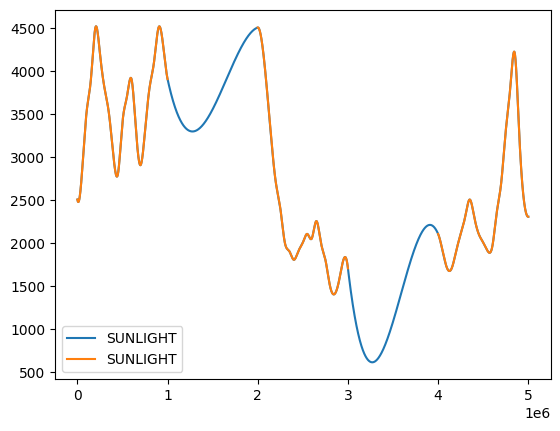

In [135]:
data = pd.concat([pd.read_csv(f'data/round_2/prices_round_2_day_{i}.csv', sep=';') for i in [-1,0,1]])
data["timestamp"] = data["timestamp"]+data["DAY"]*1000000*2
data["timestamp"] -= data["timestamp"].min()
data.drop("DAY", axis=1, inplace=True)
data.set_index("timestamp", inplace=True,drop=True)
data = data.reindex(pd.Index(range(data.index.min(),data.index.max(),100)))
data_i = data.interpolate(method="cubicspline")
key = "SUNLIGHT"
pd.concat([data_i[key], data[key]], axis=1).plot()

In [162]:
data.iloc[40000]

ORCHIDS           1098.25
TRANSPORT_FEES       0.90
EXPORT_TARIFF       10.50
IMPORT_TARIFF       -5.00
SUNLIGHT          2100.00
HUMIDITY            70.00
Name: 4000000, dtype: float64

In [160]:
px.line(data["SUNLIGHT"])

In [157]:
production = data["HUMIDITY"]*0+100 - ((data["HUMIDITY"] - 70).abs()-10).clip(0)*2/5

In [159]:
px.line(production)